In [1]:
from magnetic_ophyd import Magnetic

In [ ]:
MagneticO = Magnetic(prefix="...",name="MagneticO")
# MagneticO.stage()
# print(MagneticO.read())

# print(MagneticO.get())
# print(MagneticO.describe())


In [ ]:
print(MagneticO.read())

OrderedDict([('MagneticO_magnetic_current', {'value': 0.000163, 'timestamp': 1685714984.0675766}), ('MagneticO_magnetic_field', {'value': 19.32, 'timestamp': 1685714984.06903}), ('MagneticO_magnetic_voltage', {'value': 0.001, 'timestamp': 1685714984.06903}), ('MagneticO_magnetic_ADCDAC_temp', {'value': 48.341, 'timestamp': 1685714984.06903}), ('MagneticO_magnetic_box_temp', {'value': 40.22, 'timestamp': 1685714984.06903}), ('MagneticO_magnetic_rack_temp', {'value': 38.22, 'timestamp': 1685714984.070248}), ('MagneticO_magnetic_water_temp', {'value': 3.89, 'timestamp': 1685714984.070248}), ('MagneticO_magnetic_water_flow', {'value': 5.9, 'timestamp': 1685714984.070248})])


In [ ]:
MagneticO.summary()

data keys (* hints)
-------------------
*MagneticO_magnetic_ADCDAC_temp
*MagneticO_magnetic_box_temp
*MagneticO_magnetic_current
*MagneticO_magnetic_field
*MagneticO_magnetic_rack_temp
*MagneticO_magnetic_voltage
*MagneticO_magnetic_water_flow
*MagneticO_magnetic_water_temp

read attrs
----------
magnetic_current     MagneticCurrent     ('MagneticO_magnetic_current')
magnetic_field       MagneticField       ('MagneticO_magnetic_field')
magnetic_voltage     MagneticVoltage     ('MagneticO_magnetic_voltage')
magnetic_ADCDAC_temp MagneticADCDACTemp  ('MagneticO_magnetic_ADCDAC_temp')
magnetic_box_temp    MagneticBoxTemp     ('MagneticO_magnetic_box_temp')
magnetic_rack_temp   MagneticRackTemp    ('MagneticO_magnetic_rack_temp')
magnetic_water_temp  MagneticWaterTemp   ('MagneticO_magnetic_water_temp')
magnetic_water_flow  MagneticWaterFlow   ('MagneticO_magnetic_water_flow')

config keys
-----------

configuration attrs
-------------------

unused attrs
------------



In [ ]:
from bluesky import RunEngine
from bluesky.plans import count
from bluesky.callbacks.best_effort import BestEffortCallback
RE = RunEngine({})
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)
from databroker import Broker
import databroker
# db = Broker.named('temp')

# Insert all metadata/data captured into db.
# RE.subscribe(db.insert)
catalog = databroker.catalog['CATALOG_PSI_IR']
RE.subscribe(catalog.v1.insert)

c:\Users\DanielM\anaconda3\envs\psi-bluesky\lib\site-packages\pims\image_reader.py:26: RuntimeWarning: PIMS image_reader.py could not find scikit-image. Falling back to matplotlib's imread(), which uses floats instead of integers. This may break your scripts. 
(To ignore this warning, include the line "warnings.simplefilter("ignore", RuntimeWarning)" in your script.)
  warnings.warn(RuntimeWarning(ski_preferred))


1

In [ ]:
from bluesky.plan_stubs import mvr, mv
# wavelength and freq has a problem
RE(mv(MagneticO.magnetic_current, 0))

()



Transient Scan ID: 1     Time: 2023-06-02 16:09:55
Persistent Unique Scan ID: 'dc1b584c-b412-4935-a07c-44b7b3b1faab'
New stream: 'primary'
+-----------+------------+----------------------------+--------------------------+----------------------------+--------------------------------+-----------------------------+------------------------------+-------------------------------+-------------------------------+
|   seq_num |       time | MagneticO_magnetic_current | MagneticO_magnetic_field | MagneticO_magnetic_voltage | MagneticO_magnetic_ADCDAC_temp | MagneticO_magnetic_box_temp | MagneticO_magnetic_rack_temp | MagneticO_magnetic_water_temp | MagneticO_magnetic_water_flow |
+-----------+------------+----------------------------+--------------------------+----------------------------+--------------------------------+-----------------------------+------------------------------+-------------------------------+-------------------------------+
|         1 | 16:09:57.4 |                      0

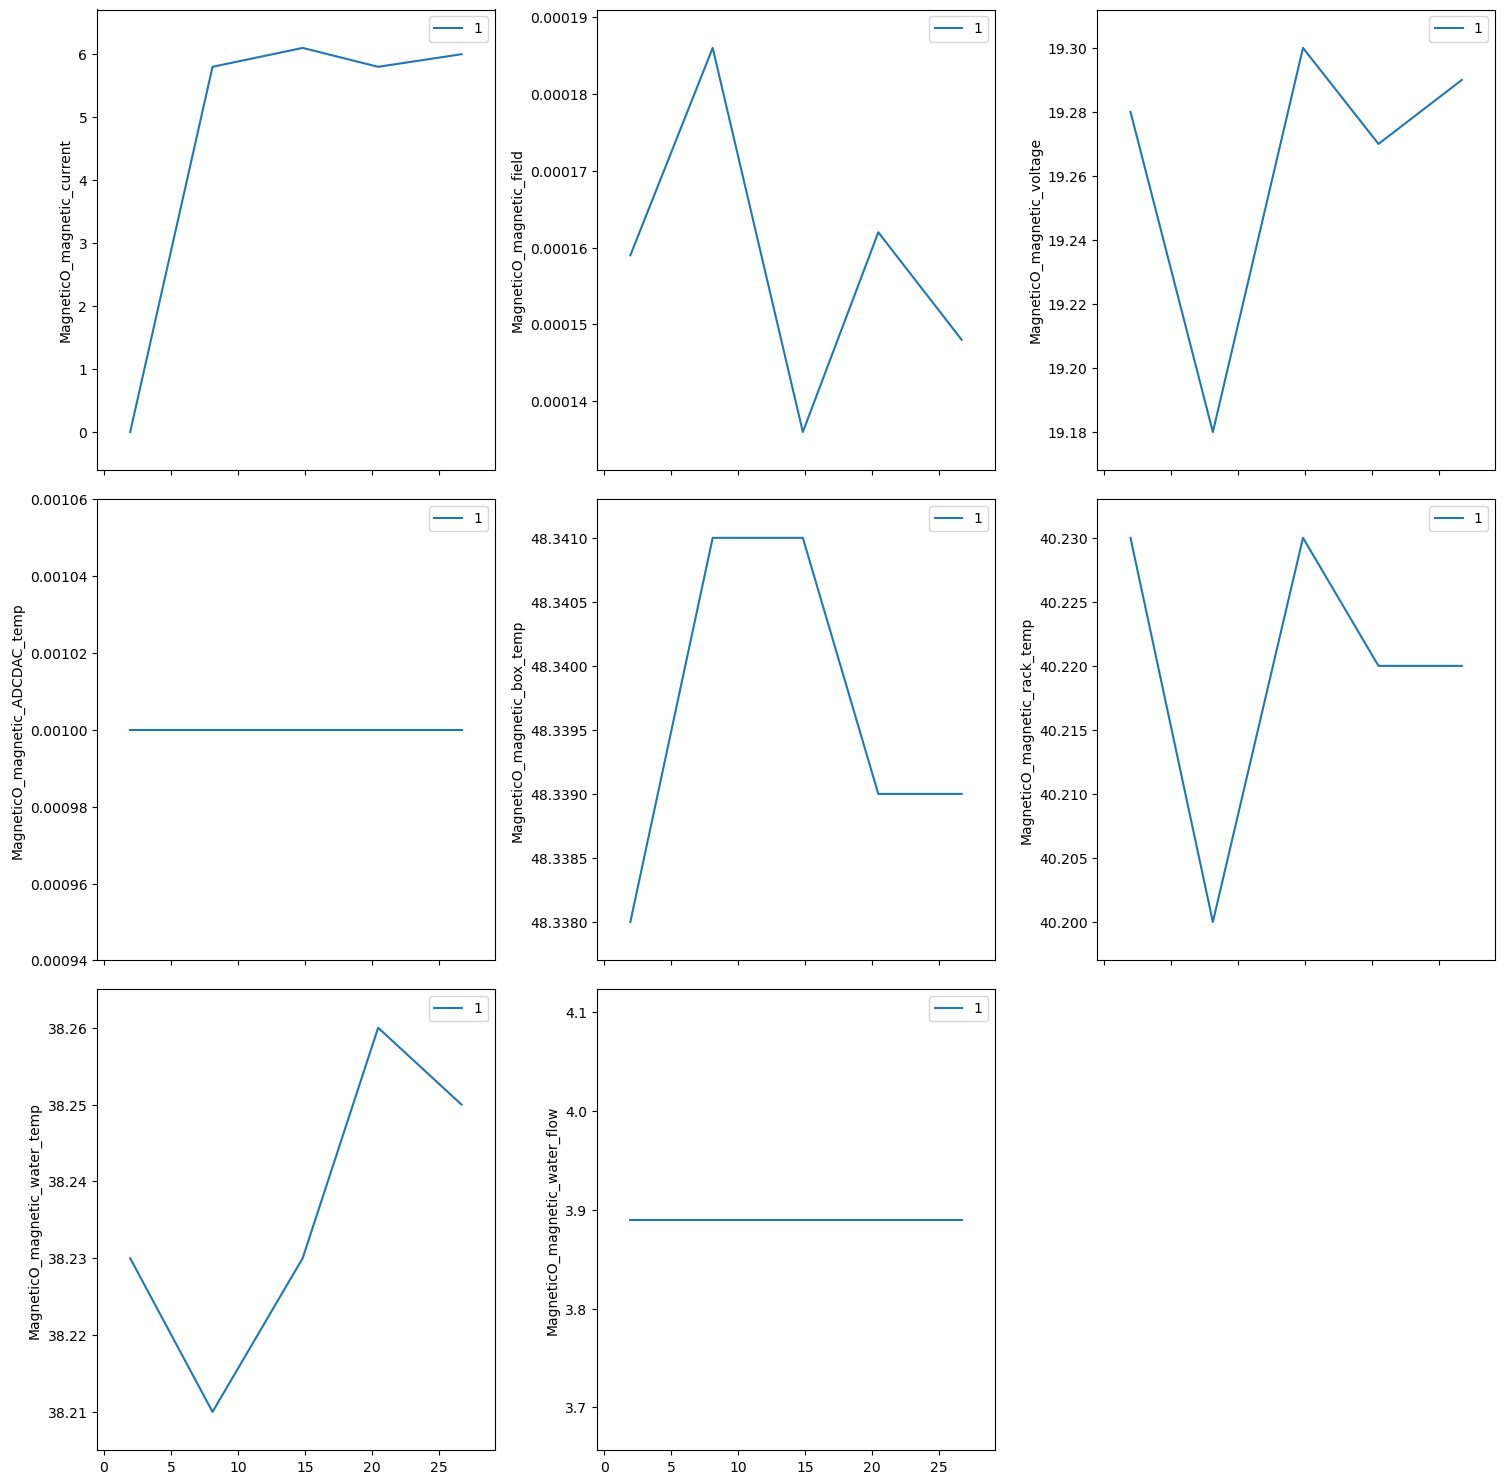

In [ ]:
# from functools import partial
# laser_count = partial(count, [MagneticO])
# countDLC, = RE(laser_count(num=5,delay=1))
# from bluesky.callbacks.mpl_plotting import LivePlot

countMag, = RE(count([MagneticO],num=5,delay=1))
# countDLC, = RE(count([MagneticO],num=5,delay=1, LivePlot('MagneticO_scan_end', 'MagneticO_scan_start')))

In [ ]:
header = catalog[countMag]
ds = header.primary.read()

In [ ]:
ds.head()

{'uid': 'dc1b584c-b412-4935-a07c-44b7b3b1faab',
 'time': 1685714995.4847844,
 'versions': {'ophyd': '1.6.1', 'bluesky': '1.6.7'},
 'scan_id': 1,
 'plan_type': 'generator',
 'plan_name': 'count',
 'detectors': ['MagneticO'],
 'num_points': 5,
 'num_intervals': 4,
 'plan_args': {'detectors': ["Magnetic(prefix='...', name='MagneticO', read_attrs=['magnetic_current', 'magnetic_field', 'magnetic_voltage', 'magnetic_ADCDAC_temp', 'magnetic_box_temp', 'magnetic_rack_temp', 'magnetic_water_temp', 'magnetic_water_flow'], configuration_attrs=[])"],
  'num': 5},
 'hints': {'dimensions': [[['time'], 'primary']]}}

In [ ]:
header.table()

,time,MagneticO_magnetic_current,MagneticO_magnetic_field,MagneticO_magnetic_voltage,MagneticO_magnetic_ADCDAC_temp,MagneticO_magnetic_box_temp,MagneticO_magnetic_rack_temp,MagneticO_magnetic_water_temp,MagneticO_magnetic_water_flow
seq_num,,,,,,,,,
1,2023-06-02 14:09:57.435242176,0.000159,0.000159,19.28,0.001,48.338,40.23,38.23,3.89
2,2023-06-02 14:10:03.581336498,5.800000,0.000186,19.18,0.001,48.341,40.20,38.21,3.89
3,2023-06-02 14:10:10.308095455,6.100000,0.000136,19.30,0.001,48.341,40.23,38.23,3.89
4,2023-06-02 14:10:15.940505266,5.800000,0.000162,19.27,0.001,48.339,40.22,38.26,3.89
5,2023-06-02 14:10:22.163839340,6.000000,0.000148,19.29,0.001,48.339,40.22,38.25,3.89


In [ ]:
from bluesky.preprocessors import SupplementalData

sd = SupplementalData()
sd.baseline = [MagneticO.magnetic_voltage]
RE.preprocessors.append(sd)



Transient Scan ID: 2     Time: 2023-06-02 16:10:42
Persistent Unique Scan ID: '5927629b-5390-464f-8236-af38c922bd2c'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|     MagneticO_magnetic_voltage | 5.8                            |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+----------------------------+--------------------------+----------------------------+--------------------------------+-----------------------------+------------------------------+-------------------------------+-------------------------------+
|   seq_num |       time | MagneticO_magnetic_current | MagneticO_magnetic_field | MagneticO_magnetic_voltage | MagneticO_magnetic_ADCDAC_temp | MagneticO_magnetic_box_temp | MagneticO_magnetic_rack_temp | MagneticO_magnetic_water_temp | MagneticO_magnetic_water_flow |
+-----------+------------+----------------------------+-----

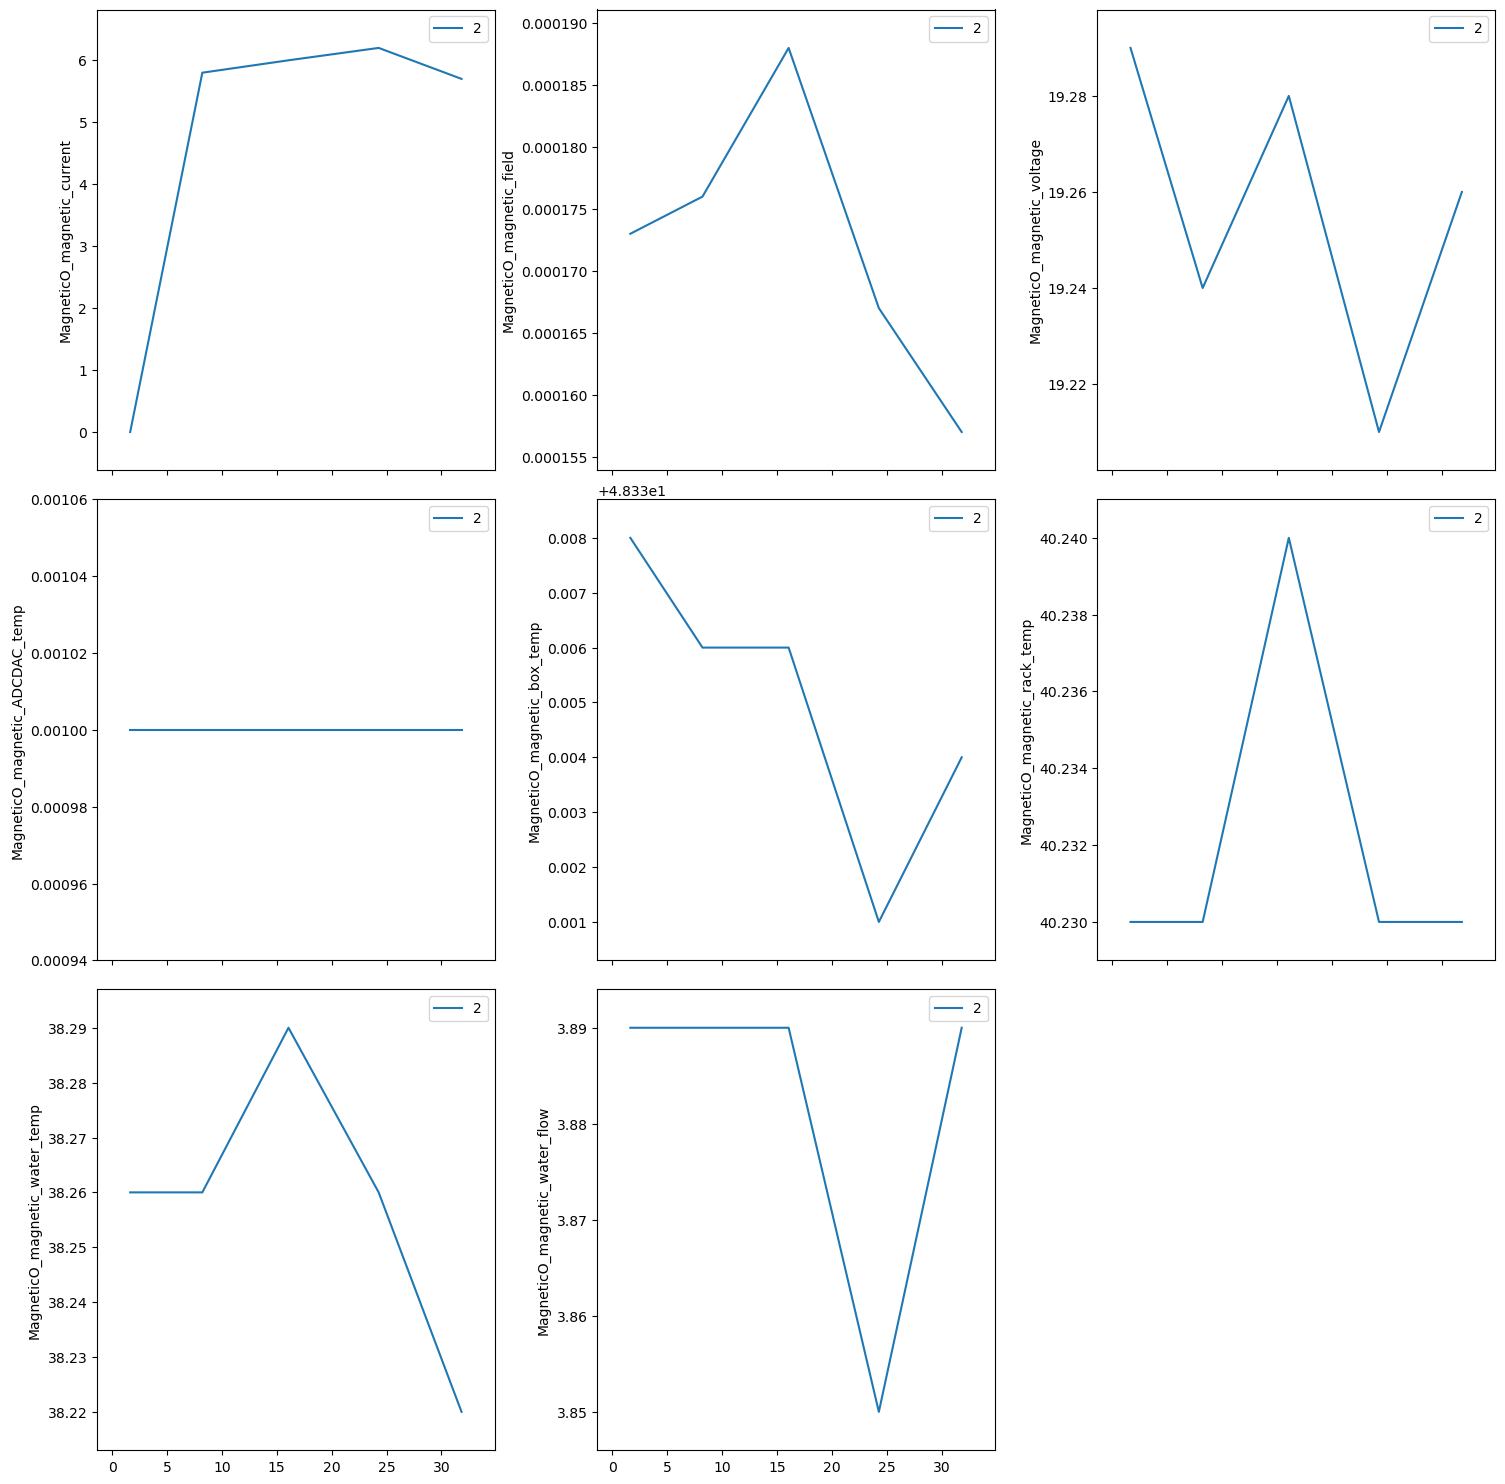

In [ ]:
countDLC, = RE(count([MagneticO],num=5,delay=1))

In [ ]:
header = catalog[countDLC]
list(header)

In [ ]:
ds1 = header.baseline.read()
ds1.head()

,time,MagneticO_magnetic_voltage
seq_num,,
1,2023-06-02 14:10:42.215025425,5.8
2,2023-06-02 14:11:19.869436979,5.9


In [ ]:
from bluesky.plan_stubs import mvr, mv
# wavelength and freq has a problem
RE(mv(MagneticO.magnetic_current, 3))

()



Transient Scan ID: 3     Time: 2023-06-02 16:11:31
Persistent Unique Scan ID: '88a74d67-52bc-4574-91a7-cf8631372170'
New stream: 'baseline'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|     MagneticO_magnetic_voltage | 0.000159                       |
+--------------------------------+--------------------------------+
New stream: 'primary'
+-----------+------------+----------------------------+--------------------------+----------------------------+--------------------------------+-----------------------------+------------------------------+-------------------------------+-------------------------------+
|   seq_num |       time | MagneticO_magnetic_current | MagneticO_magnetic_field | MagneticO_magnetic_voltage | MagneticO_magnetic_ADCDAC_temp | MagneticO_magnetic_box_temp | MagneticO_magnetic_rack_temp | MagneticO_magnetic_water_temp | MagneticO_magnetic_water_flow |
+-----------+------------+----------------------------+-----

('88a74d67-52bc-4574-91a7-cf8631372170',)

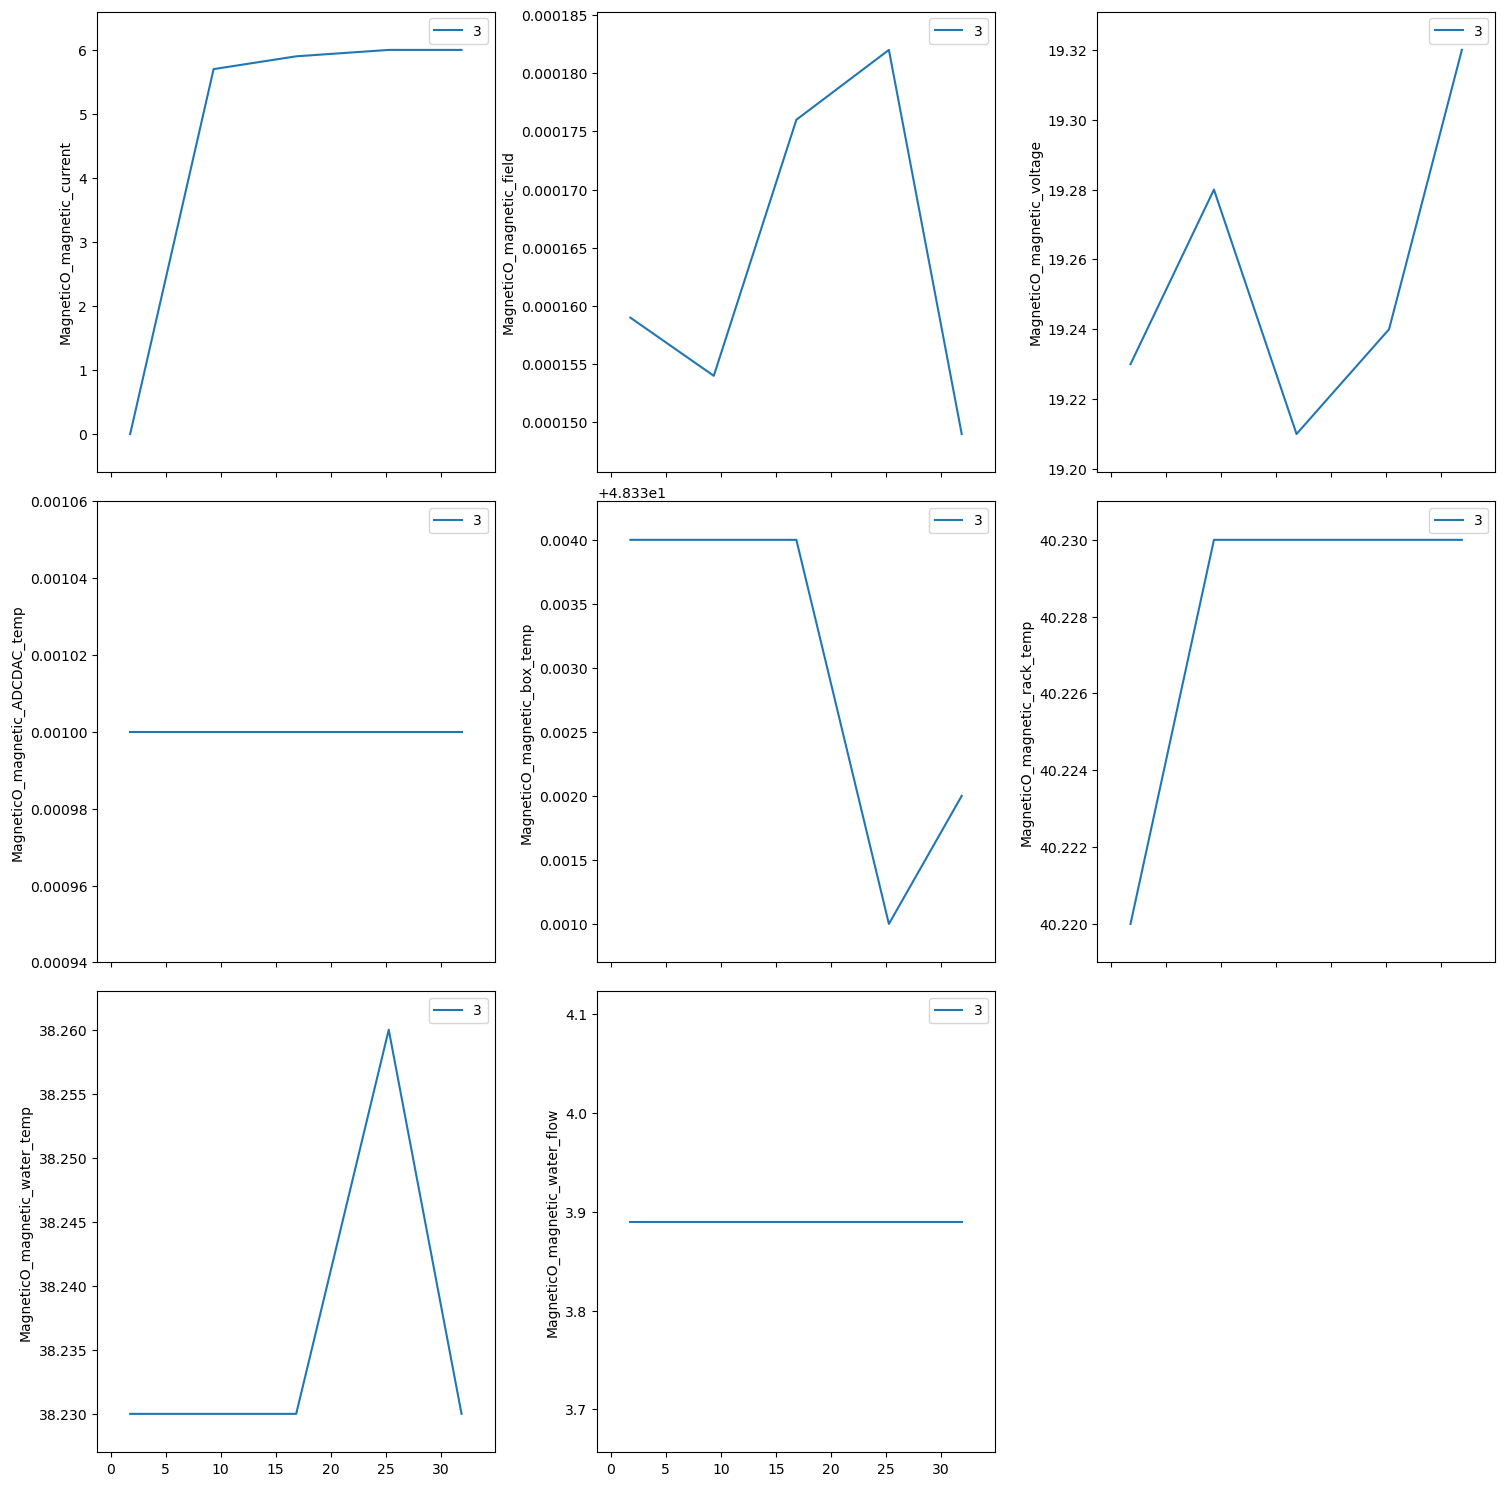

In [ ]:
RE(count([MagneticO],num=5,delay=1))

In [ ]:
# import bluesky.plans as bp
# from bluesky.plan_stubs import mv

# def load_sample(LTDLC):
# #     yield from mv(LTDLC.scan_offset, 0)
# #     yield from mv(LTDLC.ctl_wavelength_act, 1550)
#     yield from mv(LTDLC.scan_end, 70)
#     yield from mv(LTDLC.scan_start, 50)
#     yield from mv(LTDLC.scan_frequency, 10)

# def laser_plan():
#     # load the sample
#     yield from load_sample(LTDLC)
#     # take a measurement
# #     yield from bp.count([LTDLC])

In [ ]:
MagneticO.unstage()

[Magnetic(prefix='...', name='MagneticO', read_attrs=['magnetic_current', 'magnetic_field', 'magnetic_voltage', 'magnetic_ADCDAC_temp', 'magnetic_box_temp', 'magnetic_rack_temp', 'magnetic_water_temp', 'magnetic_water_flow'], configuration_attrs=[])]